##### [Computational Social Science] 
## 3-5 Neural Networks - Solutions

In this lab, we will introduce and explore neural networks. Neural nets are a popular example of "artificial intelligence." They can improve on many of the models we have learned so far, but are not without their limitations!

*Note: You might have trouble importing `keras` or `tensorflow`. For instance, your kernel might keep crashing when trying to import them. If this is the case, please open this notebook in DataHub. This allows you to run the materials in an instance on UC Berkeley's servers. No installation is needed from your end - you only need an internet browser and a CalNet ID to log in. By using the DataHub, you can save your work and come back to it at any time. Some users may have to click the link twice if the materials do not load initially.*

[![D-Lab DataHub](https://img.shields.io/badge/launch-D--Lab%20datahub-blue)](https://dlab.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdlab-berkeley%2FComputational-Social-Science-Training-Program&urlpath=lab%2Ftree%2FComputational-Social-Science-Training-Program%2F)


## Virtual Environment
Remember to always activate your virtual environment first before you install packages or run a notebook! This helps to prevent conflicts between dependencies across different projects and ensures that you are using the correct versions of packages. You must have created anaconda virtual enviornment in the `Anaconda Installation` lab. If you have not or want to create a new virtual environment, follow the instruction in the `Anaconda Installation` lab. 

<br>

If you have already created a virtual enviornment, you can run the following command to activate it: 

<br>

`conda activate <virtual_env_name>`

<br>

For example, if your virtual environment was named as CSS, run the following command. 

<br>

`conda activate CSS`

<br>

To deactivate your virtual environment after you are done working with the lab, run the following command. 

<br>

`conda deactivate`

<br>

![AI then and now.png](../../images/ai_now_and_then.jpg)

Sklearn does have neural network implementations, but these may not always be adequate. Neural networks benefit from access to more powerful hardware, so we will also see some examples with more common neural network libraries. If you do not already have [keras](https://keras.io/) and [tensorflow](https://www.tensorflow.org/) installed, run the following lines of code. 

**NOTE THAT YOU IF YOU CONTINUE TO HAVE PROBLEMS INSTALLLING MODULES FROM THE KERAS LIBRARY, IT MIGHT BE EASIER TO JUST CREATE A NEW WORKING ENVIRONEMENT. THIS IS LIKELY BECAUSE THERE IS SOME COMPONENT OF THE KERAS LIBRARY THAT IS INCOMPATIABLE WITH WHAT WE DOWNLOADED AND INSTALLED AT THE BEGINNING OF THE LAB**


In [1]:
# Uncomment and install if keras and tensorflow are not already installed in your machine
#!pip install tensorflow
#!pip install keras

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# Keras libraries
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

## Neural Networks

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns.

Neural networks help us cluster and classify. They group unlabeled data according to similarities among the example inputs.

Classification problems depend on labeled datasets, i.e. humans need to label the data for a neural to learn the correlation between labels and data. This is supervised learning. Below, we'll dive into MLP, which utilizes a supervised learning technique.

## Multi-Layer Perceptrons

A multi-layer perceptron (MLP) is a class of neural network that consists of at least three layers of nodes (first layer being inputs and last layer being outputs). Except for the input layer, activation of nodes of a certain layer depends on which nodes are activated in the previous layer. Each node is a neuron that uses a nonlinear activation function. Below is an image that represents a MLP.

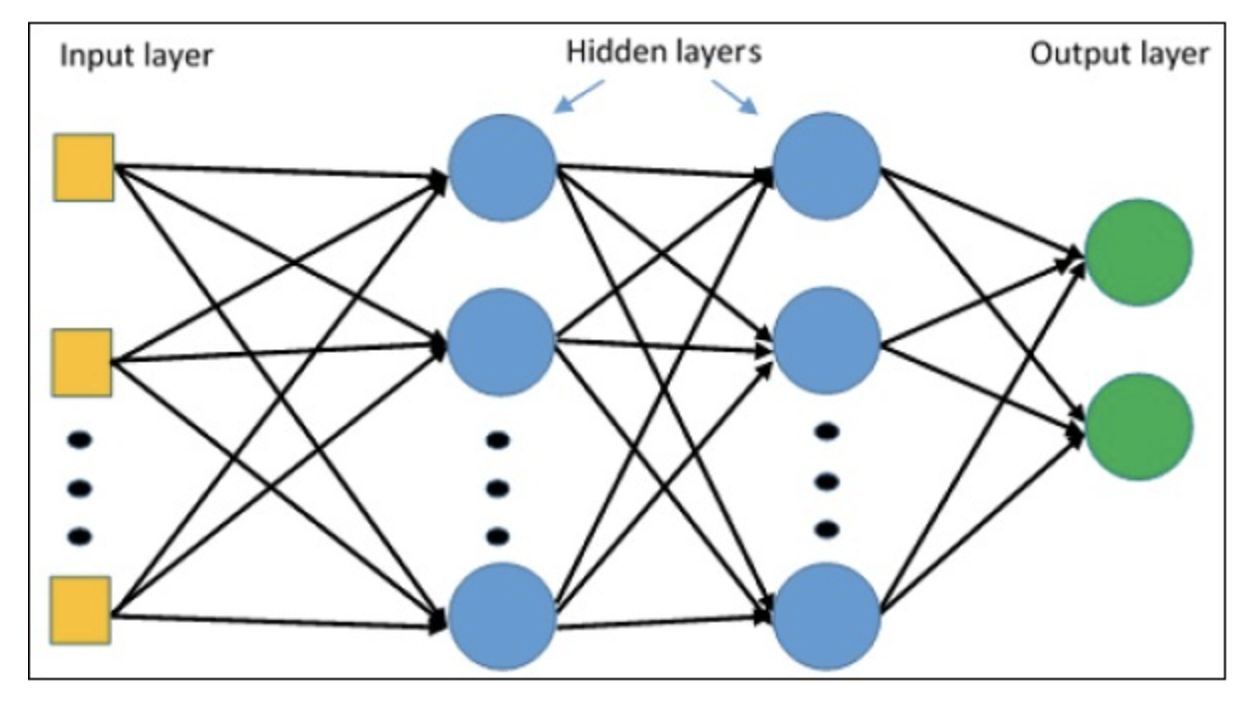

# Load Data

For this lab, we will use the famous [Handwritten Digits Data Set](http://yann.lecun.com/exdb/mnist/). The dataset contains images of handwritten number digits from 0 - 9. The training set has 60,000 examples and the test set has 10,000 examples.

In [3]:
# 
# Load data
# ---------------------------------------
digits = load_digits()
print('%d samples' %len(digits.target)) 

1797 samples


How many classes do we have in the target?

In [4]:
# print unique targets
print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


And let's look at what the features look like:

In [5]:
# look at what the features look like
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Looks like the features are stored as an array! This type of structure is common when working with image and video data. In this case, the values correspond to pixel values in an 8x8 image. Let's plot the first 64 samples to see what we're working with:

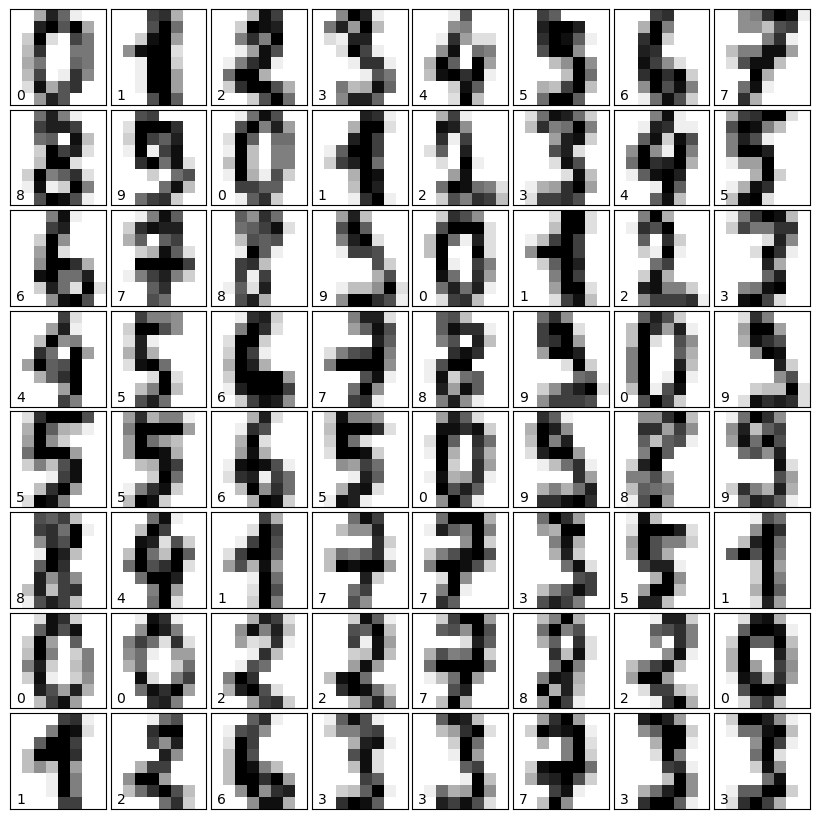

In [6]:
#
# Plot the first 64 samples to get a sense of the data
# ---------------------------------------

# figure specifications
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, 
                    right=1, 
                    bottom=0, 
                    top=1, 
                    hspace=0.05,
                    wspace=0.05)

# loop over first 64 samples to visualize
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

**QUESTION**: What do you notice about these handwritten digits? Do some of them look ambiguous enough that a computer might struggle to read them?

**ANSWER**: Some of the digits could be confusing for a computer. For instance some "2s" look like "3s" and "7s" with a dash could be mistake for a "4."

Next, let's make our usual train test splits. Fill in the following code to to do a 80/20 split.

In [7]:
#
# Partion data 
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(digits.data,     # specify data attribute as features
                                                    digits.target,   # specify target attribute as outcome
                                                    test_size=0.2,   # implied training dataset size
                                                    random_state=16) # set random state variable

We should also be sure to preprocess data. As with more conventional numerical data, the `fit_transform()` method of [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) can be useful here.

In [8]:
#
# Initialize standard scaler
# ---------------------------------------
# initalize the scaler
scaler = StandardScaler() 

# standardize training and test datasets by fitting & transforming the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Now let's initialize and fit the model! We are going to use a multilayer perception classifier, or [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Try experimenting with some different parameters to initialize the model, and then fit it. In particular, try using the "hidden_layer_sizes" and "activation" hyperparameters.

In [9]:
#
# Specify an Artificial Neural Network classifier (ANN)
# ---------------------------------------

#  specify parameters of ANN
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),    # specify # of neurons in hidden layers
                    activation='logistic',            # specify activation function
                    max_iter = 1000)                  # specify # of iterations

# train the classifier on the training data
mlp.fit(X_train_scaled, 
        y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 30, 30),
              max_iter=1000)

Now let's plot the confusion matrix to take a look at how well we did! Run the code below to plot the confusion matrix. Note that we also call the "predict" function. 

In [10]:
#
# Define function for a confusion matrix to visualize how well we did
# ---------------------------------------

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    In this case, normalizing makes it hard to read the output,
    so we'll leave it as the counts instead.
    """
    import itertools
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

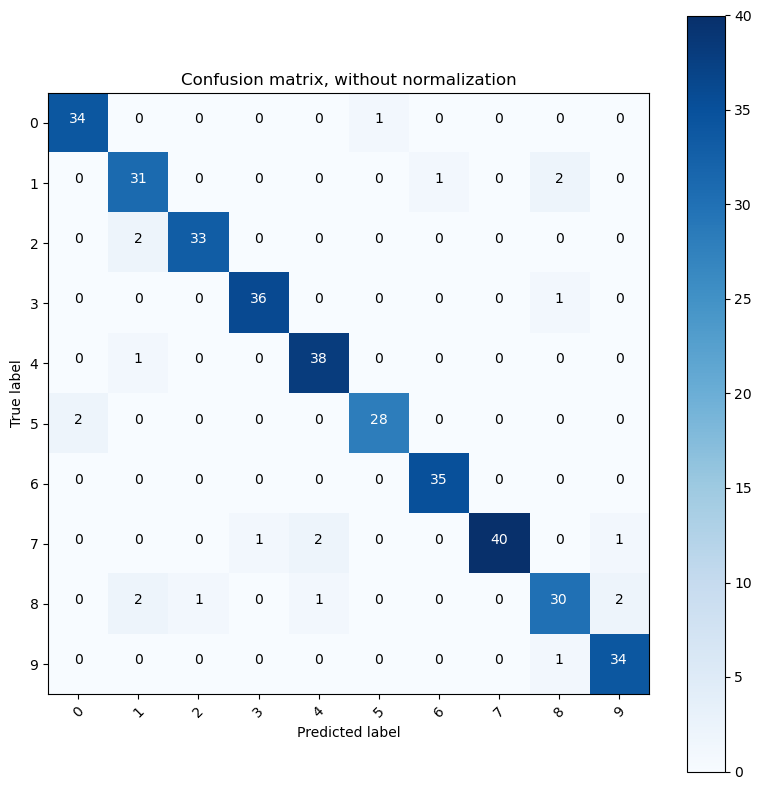

In [11]:
#
# Predict results on the test data
# ---------------------------------------

# predict on the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,
                      predicted)
plot_confusion_matrix(cm,                          # confusion matrix
                      classes=digits.target_names, # class names 
                      title='Confusion matrix, without normalization')

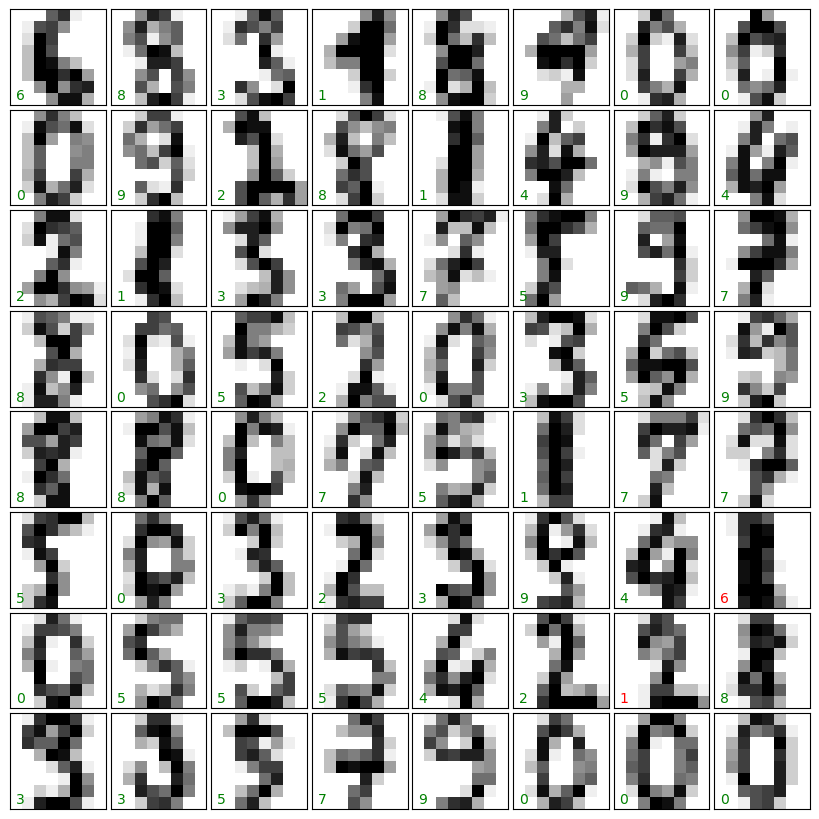

In [12]:
#
# Compare predicted with actual for 64 observations as we did above
# ---------------------------------------

# define plot specifications
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot each of the digits as we did above: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')
        
plt.show()

**QUESTION**: Taking a look at the plot above to see where we correctly classified and misclassified certain digits. Are you surprised by the ones that were misclassified? What does the red and the greeen mean in this plot?

**ANSWER**: The ones that were misclassified do look a little ambiguous, in part because they are a little fuzzy. The red are what the neural net predicted if prediction was not the same as the actual. 

## Keras Implementation

### Preprocessing

Now, let's try the same thing with the `keras` library. The main advantage of `keras` is that it is built on `tensorflow`, which provides access to the latest deep learning models and can take advantage of higher-end hardware than sklearn. It's particularly helpful because it can handle more complicated data. 

We won't be using Graphical Processing Units (GPUs) or Tensor Processing Units (TPUs) in this lab, but it is a good idea to keep them in the back of your mind as you continue to explore AI and deep learning.

First, let's reload the dataset, using the keras example this time: 

In [13]:
#
# Load data 
# ---------------------------------------
# Note this is not splitting them into training and testing. 
# Rather, they are already split and available as such. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# check out the training data form
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
# print out some descriptives of the training and testing datasets
print(f'The dataset contains {len(x_train)} training data samples, and {len(x_test)} test data samples')

The dataset contains 60000 training data samples, and 10000 test data samples


Now let's plot the images we're working with. 

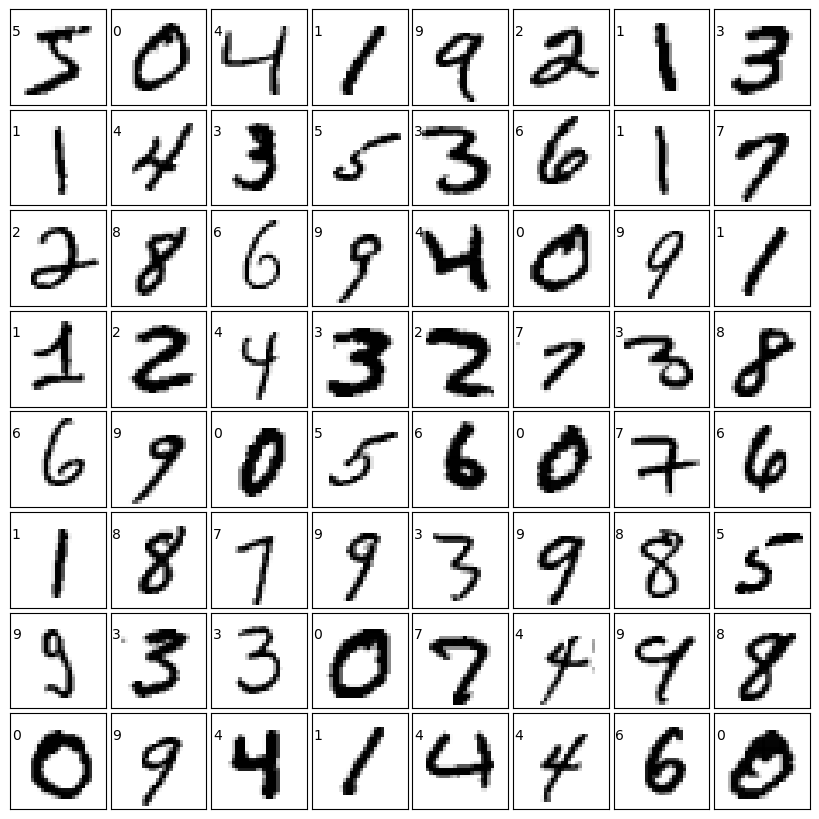

In [16]:
#
# EDA
# ---------------------------------------

# plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# loop over first 64 samples to visualize
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))
    
plt.show()

Now let's preprocess the data to get it ready for analysis. Run the following code to flatten the training and test features, and normalize the data by dividing the maximum pixel value.

In [17]:
# Can we see how many pixels we have per image?
# ----------
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

In [18]:
# Looks like it's 784. Let's flatten the images into 1D array
# ----------
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)

# Convert the data type from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_train /= 255
x_test /= 255

Then use keras [`to_categorical()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) to convert the target label. 

**QUESTION:** What process does this remind you from sklearn?


In [19]:
# set the number of classes
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 
                                     num_classes)
y_test = keras.utils.to_categorical(y_test, 
                                    num_classes)

**ANSWER**: This is similar to `get_dummies` from pandas and one-hot encoding from sklearn

In [20]:
# Let's look at the first label to see how it has been binarized
print(y_train[0])  

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**QUESTION:** What number does this frist record correspond to?

**ANSWER:** It's a 5 because there is a "1" in the 6th position.

In [21]:
# set the number of classes, which we'll need below
num_classes = y_test.shape[1]
num_classes

10

### Modeling
We can build a multilayer perception network by adding layers to the model. Let's start with an empty stack (base model) and then we can build on that.

In [22]:
#
# intialize the sequential model
# ---------------------------------------
model = Sequential()

Create an input layer using the Dense function (refer to <a href="https://keras.io/layers/core/">this doc</a>), then add the layer to our model using `model.add(...)`. The input layer should use ['relu'](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation, a 'normal' [kernel_initializer](https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance), and the number of pixels for input_dim. `Relu` is a "rectified" activation function that is flat before the activiation threshold and then positively slopes up. The kernel initializer determines the probability distribution to draw the initial weights from. 

In [23]:
# input layer
# -----------

"""
Dense(...) creates a regular densely connected layer. 
relu is a rectifier activation function.
"""
model.add(  
    Dense(num_pixels,                   # specify the number of neurons
          input_dim=num_pixels,         # specify the input shape
          kernel_initializer='normal',  # specify method for initializing weights - follows Gaussian distribution
          activation='relu')            # specify activation function
)

Add in the output layer to our model. We then initialize the output layer using a ["softmax"](https://en.wikipedia.org/wiki/Softmax_function) activation function. Softmax is an extension of logistic regression that extends to multiple categories.

In [24]:
# output layer
# -----------

"""
A softmax activation function is used on the output layer to turn the outputs into 
probability-like values. 
"""
model.add(
    Dense(num_classes,                 # specify the number of output units,
          kernel_initializer='normal', # specify method for initializing weights - follows Gaussian distribution
          activation='softmax')        # specify activation function - softmax turns output to probabilities
)

Compile our model. We will use ["categorical crossentropy"](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) as our loss measure. Cross-entropy is a measure of the difference in the probability distribution implied by the predictions and the distribution implied by the actual values. ['Adam'](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) stands for adaptive moment estimation. At a high level, it utilizes second moments to update the [learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/) dynamically. The learning rate controls how much the model will update when faced with errors.

In [25]:
# compile the model
# -----------

"""
categorical_crossentropy is a logarithmic loss function and
adam is a gradient descent algorithm
"""
model.compile(loss='categorical_crossentropy',   # specify the loss function
              optimizer='adam',                  # specify optimizer - Adam is an adaptive learning rate optimization algorithm.
              metrics=['accuracy'])              # specify metrics

Let's now fit our model on the training dataset. We fit our model over 10 epochs and update it every 200 images. It might take a few minutes.

In [26]:
#
# fit model
# ---------------------------------------
model.fit(x_train,                  # specify the x data
          y_train,                  # specify the y data
          validation_data=(x_test,  # specify the validation data
                           y_test), 
          epochs=10,                # number of iterations back and forth through the network
          batch_size=200,           # number of images it will input per batch 
          verbose=2);               # print as it goes (similar to folds in cross validation)

Epoch 1/10
300/300 - 1s - loss: 0.2841 - accuracy: 0.9196 - val_loss: 0.1444 - val_accuracy: 0.9572 - 991ms/epoch - 3ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1117 - accuracy: 0.9676 - val_loss: 0.1075 - val_accuracy: 0.9665 - 769ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0716 - accuracy: 0.9796 - val_loss: 0.0803 - val_accuracy: 0.9745 - 810ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0507 - accuracy: 0.9854 - val_loss: 0.0734 - val_accuracy: 0.9751 - 775ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0359 - accuracy: 0.9899 - val_loss: 0.0636 - val_accuracy: 0.9799 - 770ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.0652 - val_accuracy: 0.9795 - 801ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0204 - accuracy: 0.9947 - val_loss: 0.0625 - val_accuracy: 0.9803 - 768ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.0600 - val_accuracy: 0.9820 - 772ms/epoch - 3ms/step


**QUESTION:** How do we interpet this model?

**ANSWER:** As it feeds more data through the network, the validation scores improve but only up to a certain point. 

## BONUS: Convolutional Neural Networks

MLPs did give us pretty good accuracy. However, as each pixel of an image is an input, we will have too many inputs for a large image. Convolutional neural nets, on the other hand, can take in 3-D inputs (2D + color) instead of just 1-D.

<img src="../../images/convolution_highlevel.png" style="width: 900px;"/>

#### Filtering

ConvNets have "features" and match them with parts of an image rather than the whole thing. 

<img src="../../images/match_pieces.png" style="width: 500px;"/>

In the example above, we have three features: left-to-right diagonal, central X, and right to left diagonal. To match features, we use a process called filtering.

1. Assign each black pixel -1 and each white pixel 1. 
2. Line up a feature with an image patch (for example, line up left-to-right diagonal with the green box above)
3. Multiply each feature pixel with the corresponding image patch pixel
4. Take the average of the products

**QUESTION:** In the example above when we match the left-to-right diagonal feature with the green box, what would the process output?

**ANSWER:** 1, because it perfectly aligns.

#### Convolutional Layer
 
The process of filtering for every possible image patch with every feature.

<img src="../../images/convolution.png" style="width: 500px;"/>

As you can see in the image above, after applying our left-to-right diagonal filter, we get higher scores on the left to right diagonal.

**QUESTION:** If we apply the central X filter in this example, where will the highest score occur?

**ANSWER:** The very center of the entire image.

#### ReLU (Rectified Linear Units)

This process is applied on filtered images. It simply changes every negative value to 0 and leaves positive values unchanged.

#### Pooling Layer

In this layer, we shrink the filtered images by the following process:
1. Pick a window size and a stride size
2. Walk our window on the filtered image, each time shifting by the stride size
3. For each step, take the maximum score contained in the window

![pooling](../../images/pooling.png)


This layer helps because it does not care about where in the window the maximum value occurs, i.e. it's less sensitive to specific positioning of pixels.

**QUESTION:** How would the pooling layer help in classifying digits? 

**ANSWER:** Handwritten digits follow a general pattern but where each pixel lands can be undeterminstic. Matching parts of an image can tell us which general pattern occurs without caring too much about where it occurs.

#### Fully Connected Layer

This layer flattens the pooled images and each value gets a vote, which is how strongly that value suggests a certain outcome.

One question you might have now is where do the initial features and voting weights come from. They are obtained by a process called <a href="https://brilliant.org/wiki/backpropagation/">backpropragation</a>, which we don't have enough time to explain here.

Now we've learned that the layers are combined together: <b>convolutional + ReLU + pooling</b> constitute the first part while <b>fully connected</b> the second. One note is that each part can be applied multiple times, as we can see in the overview of a CNN at the beginning.

### Create a CNN

Keras also provides useful methods to create a CNN.

In [27]:
# load libraries
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
#from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')
#K.set_image_dim_ordering('th')
from keras.datasets import mnist

In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height]. We'll set the pixels dimension to 1 because the pixel values in MNIST are gray scale. As a reminder, all images in MNIST are 28x28.

In [28]:
# 
# load data
# ---------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Below, fill out the blanks to normalize the datasets and one hot encode the output values.

In [29]:
# normalize inputs from 0-255 to 0-1
# ----------
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
# ----------
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Let's define a function that creates our CNN. Read through the comments to understand what each line does.

In [30]:
# 
# Define the CNN model
# ---------------------------------------
def CNN_model():
    
    # create model
    model = Sequential()
    
    # A convolutional layer that has 32 features of size 5x5
    model.add(Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_uniform", input_shape = (28, 28, 1)))

    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # A dropout layer that randomly excludes 20% of neurons in the layer 
    model.add(Dropout(0.2))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
# 
# Fit the CNN model
# ---------------------------------------

# Initialize the model
# ----------
model = CNN_model()

# Fit the model
# ----------
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate of the model
# ----------
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2257 - accuracy: 0.9317 - val_loss: 0.0868 - val_accuracy: 0.9734 - 4s/epoch - 14ms/step
Epoch 2/10
300/300 - 4s - loss: 0.0789 - accuracy: 0.9758 - val_loss: 0.0591 - val_accuracy: 0.9809 - 4s/epoch - 14ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0505 - val_accuracy: 0.9834 - 4s/epoch - 14ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0462 - val_accuracy: 0.9855 - 5s/epoch - 15ms/step
Epoch 5/10
300/300 - 5s - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0464 - val_accuracy: 0.9857 - 5s/epoch - 15ms/step
Epoch 6/10
300/300 - 4s - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0367 - val_accuracy: 0.9868 - 4s/epoch - 15ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0454 - val_accuracy: 0.9855 - 4s/epoch - 15ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0425 - val_accuracy: 0.9862 - 4s/epoch - 15ms/step
Epoch 9/10
300/3

Now let's experiment with some of the parameters (e.g., number of features, size of features, size of the window in pooling, dropout percentage). Modify the parameters in the function below and see how the Error rates differs from the model above. **For comparision purposes, use the same layers.**

In [32]:
# 
# Define a slightly different CNN model
# ---------------------------------------
def diff_CNN_model():
    
    # create model
    model = Sequential()
    
    # A convolutional layer that has 32 features of size 5x5
    model.add(Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_uniform", input_shape = (28, 28, 1)))
    
    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(4, 4)))
    
    # A dropout layer that randomly excludes 50% of neurons in the layer 
    model.add(Dropout(0.5))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
# 
# Fit the model
# ---------------------------------------
model = diff_CNN_model()

# Fit the model
# ----------
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate of the model
# ----------
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.4564 - accuracy: 0.8559 - val_loss: 0.1259 - val_accuracy: 0.9628 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 3s - loss: 0.1788 - accuracy: 0.9444 - val_loss: 0.0826 - val_accuracy: 0.9756 - 3s/epoch - 10ms/step
Epoch 3/10
300/300 - 3s - loss: 0.1350 - accuracy: 0.9575 - val_loss: 0.0674 - val_accuracy: 0.9781 - 3s/epoch - 9ms/step
Epoch 4/10
300/300 - 3s - loss: 0.1131 - accuracy: 0.9640 - val_loss: 0.0544 - val_accuracy: 0.9826 - 3s/epoch - 9ms/step
Epoch 5/10
300/300 - 3s - loss: 0.0990 - accuracy: 0.9687 - val_loss: 0.0507 - val_accuracy: 0.9824 - 3s/epoch - 9ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0871 - accuracy: 0.9721 - val_loss: 0.0457 - val_accuracy: 0.9842 - 3s/epoch - 9ms/step
Epoch 7/10
300/300 - 3s - loss: 0.0793 - accuracy: 0.9747 - val_loss: 0.0397 - val_accuracy: 0.9861 - 3s/epoch - 9ms/step
Epoch 8/10
300/300 - 3s - loss: 0.0704 - accuracy: 0.9778 - val_loss: 0.0434 - val_accuracy: 0.9857 - 3s/epoch - 9ms/step
Epoch 9/10
300/300 - 3

**QUESTION:** Do you get different accuracies for the two different models? Make some conclusions about different parameters.

**ANSWER:** In the example above, we only changed the dropout precentage (from 20% to 50). We can see the error rate is slightly larger in the first model. 

---
Authored by Aniket Kesari, edited by Tom van Nuenen in 2022 and Kasey Zapatka in 2023. Materials adapted from D-Lab [ANN Fundamentals](https://github.com/dlab-berkeley/ANN-Fundamentals/tree/master/notebooks) and LS123 Data, Prediction, and Law [Neural Networks](https://github.com/Akesari12/LS123_Data_Prediction_Law_Spring-2019/tree/master/labs/Neural%20Nets).